In [152]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [153]:
import pandas as pd
import numpy
import os
import cv2
import pickle
infile = open( "../../data/data_0_to_3999.p", "rb" )
data = pickle.load(infile)
infile.close()

In [154]:
X_train = [entry[0:len(entry)-1] for entry in data[0:3500]]
X_test = [entry[0:len(entry)-1] for entry in data[3500:]]

In [155]:
Y_train = [entry[-1] for entry in data[0:3500]]
Y_test = [entry[-1] for entry in data[3500:]]

In [156]:
def distance(x1, x2):
    return sum(sum(sum(abs(x1 - x2))))

In [159]:
def classify(z):
    all_distances = [distance(z[0],x[0]) for x in X_train]
    i = all_distances.index(min(all_distances))
    y_hat = Y_train[i]
    return y_hat

In [160]:
y_test_hat = [classify(z) for z in X_test]

In [161]:
n_correct = 0
for index in range(len(Y_test)):
    if Y_test[index] == y_test_hat[index]:
        n_correct += 1
print "The number of correct classifications is %d. The accuracy is thus %f" % (n_correct, float(n_correct)/len(Y_test))

The number of correct classifications is 463. The accuracy is thus 0.926000


In [164]:
import copy
X_train_reds = copy.deepcopy(X_train)
for i in range(len(X_train_reds)):
    X_train_reds[i] = X_train_reds[i][0][:,:,0]
    X_train_reds[i] = X_train_reds[i].reshape(76800)
X_test_reds = copy.deepcopy(X_test)
for i in range(len(X_test_reds)):
    X_test_reds[i] = X_test_reds[i][0][:,:,0]
    X_test_reds[i] = X_test_reds[i].reshape(76800)

In [166]:
import sklearn
scores = []
from sklearn.neighbors import KNeighborsClassifier
for k in range(1,7,2):
    model = KNeighborsClassifier(k)
    model.fit(X_train_reds, Y_train)
    y_pred = model.predict(X_test_reds)
    score = sklearn.metrics.accuracy_score(Y_test, y_pred)
    print k
    print 'Accuracy: ', sklearn.metrics.accuracy_score(Y_test, y_pred)
    print 'Precision: ', sklearn.metrics.precision_score(Y_test, y_pred)
    print 'Recall: ', sklearn.metrics.recall_score(Y_test, y_pred)
    scores.append((k,sklearn.metrics.accuracy_score(Y_test, y_pred),sklearn.metrics.precision_score(Y_test, y_pred),sklearn.metrics.recall_score(Y_test, y_pred)))

1
Accuracy:  0.976
Precision:  0.976355212355
Recall:  0.976
3

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1172: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross 


Accuracy:  0.944
Precision:  0.94558677686
Recall:  0.944
5

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1172: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross 


Accuracy:  0.912
Precision:  0.91422447205
Recall:  0.912


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1172: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1082: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross 

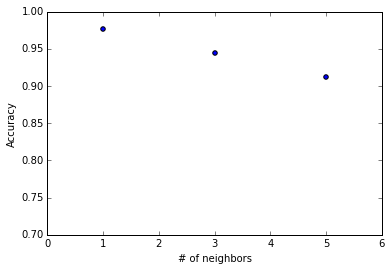

In [187]:
import matplotlib.pyplot as plt
plt.scatter([1,3,5], accuracies)
plt.ylabel('Accuracy')
plt.xlabel('# of neighbors')
plt.ylim(0.7,1)
plt.show()